<a href="https://colab.research.google.com/github/zelos-dev/machine_learning/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%EF%BC%88%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92%EF%BC%9A%E5%9B%9E%E5%B8%B0%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
dataset = load_boston()

In [ ]:
dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
x,t=dataset.data,dataset.target 
columns=dataset.feature_names

In [ ]:
type(x),x.shape

(numpy.ndarray, (506, 13))

In [ ]:
type(t),t.shape

(numpy.ndarray, (506,))

In [ ]:
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
df=pd.DataFrame(x,columns=columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df['Target']=t
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
t=df['Target'].values

In [ ]:
x=df.drop(labels=['Target'],axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,t_train,t_test=train_test_split(x,t,test_size=0.3,random_state=0,)

In [ ]:
len(x_train)

354

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.fit(x_train,t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

<BarContainer object of 13 artists>

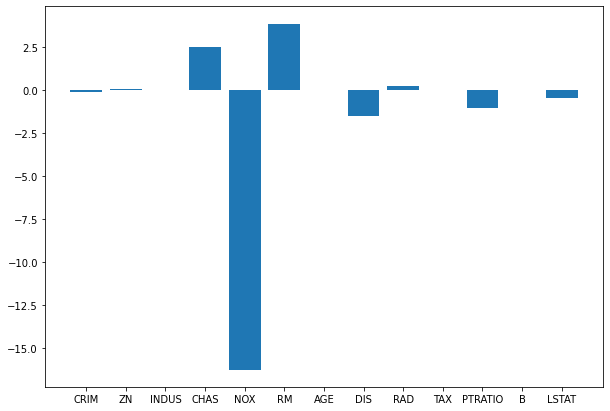

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(x=columns,height=model.coef_)

In [ ]:
model.intercept_

37.93710774183309

In [ ]:
print(f'train score:{model.score(x_train,t_train)}')
print(f'test score:{model.score(x_test,t_test)}')

train score:0.7645451026942549
test score:0.6733825506400171


In [ ]:
x_test.shape

(152, 13)

In [ ]:
y=model.predict(x_test)

In [ ]:
print(f'予測値:{y[1]}')
print(f'目標値:{t_test[1]}')

予測値:23.751631640748066
目標値:50.0


In [ ]:
df=pd.read_csv('regression_pls.csv')
df.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,9.222222,-0.333333,9.222222,0.333333,2.803039,29.019550,3.577350,2.485599,2.485599,1.732051,0.992799,0.992799,0.610650,0.610650,0.000000,0.000000,0.000,0.000,-0.53,3.245112,3.470000,0.874858,1.156009,24.605606,5.733667,0.0,0.0,5.90718,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,4.597222,1.652778,4.597222,1.652778,1.632993,2.754888,2.707107,2.077350,2.077350,1.414214,0.788675,0.788675,0.288675,0.288675,0.000000,0.000000,0.000,0.000,-0.08,2.754888,2.920000,1.920000,1.920000,19.599140,0.000000,0.0,0.0,0.00000,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,9.000000,-0.833333,9.000000,0.833333,2.803039,27.019550,3.577350,2.355462,2.355462,1.732051,0.927731,0.927731,0.519018,0.519018,0.000000,0.000000,0.000,0.000,-0.53,3.245112,3.470000,0.874858,1.156009,24.059949,5.106527,0.0,0.0,0.00000,5.969305,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.15,71.123,62.051,71.073499,30,0,-0.004845,-0.316731,0.316731,0.004845,3.222222,1.250000,3.222222,1.250000,2.083333,15.219281,3.535534,3.328427,3.328427,2.500000,2.207107,2.207107,1.457107,1.457107,0.957107,0.957107,0.625,0.625,-0.04,22.886435,3.161613,1.410312,0.618364,32.378108,5.316789,0.0,0.0,0.00000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.12,76.055,72.023,76.027277,30,0,0.335391,-0.349891,0.349891,0.335391,9.229167,-0.939815,9.229167,0.939815,2.847379,42.912609,4.284457,2.432812,2.432812,2.270056,0.966406,0.966406,0.476054,0.476054,0.110193,0.110193,0.000,0.000,-0.77,9.651484,4.230000,1.539598,3.230000,28.538798,5.733667,0.0,0.0,0.00000,0.000000,6.031115,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(1290, 197)

In [ ]:
t=df['Target']
x=df.drop('Target',axis=1).values

In [ ]:
t.shape

(1290,)

In [ ]:
x.shape

(1290, 196)

In [ ]:
x_train,x_test,t_train,t_test=train_test_split(x,t,test_size=0.3,random_state=0)


In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f'train score:{model.score(x_train,t_train)}')
print(f'test score:{model.score(x_test,t_test)}')

train score:0.9365472506823411
test score:0.003576724162620226


In [ ]:
df_col=df.corr()

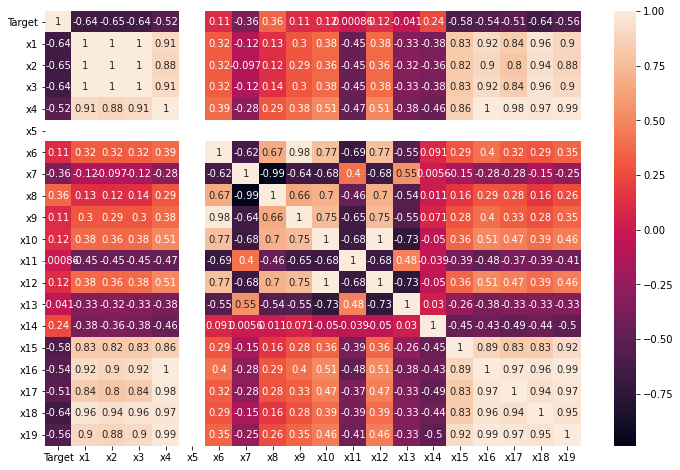

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_col.iloc[:20,:20],annot=True)

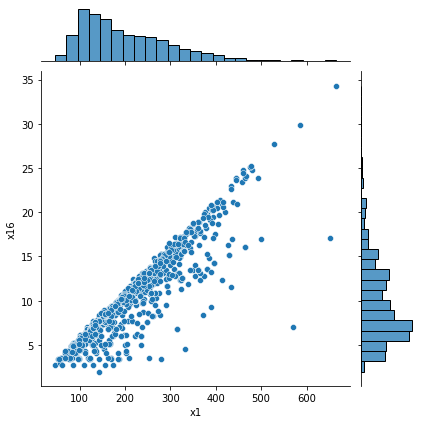

In [ ]:
sns.jointplot(x='x1',y='x16',data=df)

In [ ]:
from sklearn.cross_decomposition import PLSRegression

In [ ]:
pls=PLSRegression(n_components=11)

In [ ]:
pls.fit(x_train,t_train)

PLSRegression(copy=True, max_iter=500, n_components=8, scale=True, tol=1e-06)

In [ ]:
print(f'train score:{pls.score(x_train,t_train)}')
print(f'test score:{pls.score(x_test,t_test)}')

train score:0.910065950410139
test score:0.7414670894980244
